In [296]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import datetime


## Loading Dataframes from CSVs and TSVs

In [297]:
#Load 
the_movie_db_df = pd.read_csv('zippedData/tmdb.movies.csv')

In [298]:
the_movie_db_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [299]:
gross_df = pd.read_csv('zippedData/bom.movie_gross.csv')

gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [300]:
tomato_movieinfo_df = pd.read_csv('zippedData/rt.movie_info.tsv', sep = '\t')
tomato_movieinfo_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [301]:
tomato_reviews_df = pd.read_csv('zippedData/rt.reviews.tsv', sep = '\t', encoding = 'latin-1')
tomato_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [302]:
tn_movie_budgets_db = pd.read_csv('zippedData/tn.movie_budgets.csv')
tn_movie_budgets_db.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Loading Dataframes from IMDB Database

It might more useful to join things from SQL, but I think this works well too. We can always edit this later

In [303]:
conn = sqlite3.connect('zippedData/im.db')

In [304]:
table_name_query = """SELECT *
FROM persons"""

imdb_persons_df = pd.read_sql(table_name_query, conn)
imdb_persons_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [305]:
table_name_query = """SELECT *
FROM principals"""

imdb_principals_df = pd.read_sql(table_name_query, conn)
imdb_principals_df.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [306]:
table_name_query = """SELECT *
FROM known_for"""

imdb_known_for_df = pd.read_sql(table_name_query, conn)
imdb_known_for_df.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [307]:
table_name_query = """SELECT *
FROM directors"""

imdb_directors_df = pd.read_sql(table_name_query, conn)
imdb_directors_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [308]:
table_name_query = """SELECT *
FROM writers"""

imdb_writers_df = pd.read_sql(table_name_query, conn)
imdb_writers_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [309]:
table_name_query = """SELECT *
FROM movie_basics"""

imdb_movie_basics_df = pd.read_sql(table_name_query, conn)
imdb_movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [310]:
table_name_query = """SELECT *
FROM movie_ratings"""

imdb_movie_ratings_df = pd.read_sql(table_name_query, conn)
imdb_movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [311]:
table_name_query = """SELECT *
FROM movie_akas"""

imdb_movie_akas_df = pd.read_sql(table_name_query, conn)
imdb_movie_akas_df.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


## Find most profitable movies

Lets look inside the tn_movie_budgets_df to find the most profitable

In [312]:
def money_to_int(string):
    return int(string.replace('$', '').replace(',', ''))

In [313]:
worldwide_gross = tn_movie_budgets_db['worldwide_gross'].map(money_to_int)
production_budget = tn_movie_budgets_db['production_budget'].map(money_to_int)

tn_movie_budgets_db['worldwide_gross'] = tn_movie_budgets_db['worldwide_gross'].map(money_to_int)
tn_movie_budgets_db['production_budget'] = tn_movie_budgets_db['production_budget'].map(money_to_int)
tn_movie_budgets_db['domestic_gross'] = tn_movie_budgets_db['domestic_gross'].map(money_to_int)

tn_movie_budgets_db['worldwide_profits'] = worldwide_gross - production_budget

In [314]:
tn_movie_budgets_db.loc[tn_movie_budgets_db['movie'] == 'Gone with the Wind']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profits
4567,68,"Dec 15, 1939",Gone with the Wind,3900000,198680470,390525192,386625192


In [315]:
tn_movie_budgets_db.sort_values('worldwide_profits', ascending= False).head(10)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profits
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864
66,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157
41,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799


### Adjusting for Inflation

In [316]:
#inflation_df = pd.read_excel('zippedData/inflation.xlsx', skiprows=11)

In [317]:
#inflation_df.drop(['HALF1', 'HALF2'], axis = 'columns', inplace = True)

jk, not actually going to adjust for inflation, lets just do a ratio instead

In [318]:
eighties_dollars_df = pd.read_csv('zippedData/CPIAUCNS.csv')

In [319]:
eighties_dollars_df

,DATE,CPIAUCNS
0,1913-01-01,9.800
1,1913-02-01,9.800
2,1913-03-01,9.800
3,1913-04-01,9.800
4,1913-05-01,9.700
...,...,...
1304,2021-09-01,274.310
1305,2021-10-01,276.589
1306,2021-11-01,277.948
1307,2021-12-01,278.802


Keep in mind that this dataset will normalize on 1983 dollars

In [320]:
#This is a table of rates of dollar by date to 1983 dollars by month
# eighties_dollars_df['CPIAUCNS'] = eighties_dollars_df['CPIAUCNS'].map(lambda x: x/100) 

Convert the dates to datetime type for easier code

In [321]:
eighties_dollars_df['DATE'] = eighties_dollars_df['DATE'].map(lambda x: str(pd.to_datetime(x)))
tn_movie_budgets_db['release_date'] = tn_movie_budgets_db['release_date'].map(lambda x: str(pd.to_datetime(x)))

In [322]:
# tn_budget_83_df = tn_movie_budgets_db
# tn_budget_83_df.rename({'release_date' : 'DATE'}, axis = 'columns', inplace = True)

# tn_budget_83_df['DATE'] = tn_budget_83_df['DATE'].map(lambda x: x[:7])
# eighties_dollars_df['DATE'] = eighties_dollars_df['DATE'].map(lambda x: x[:7])

Take the CPI and find the conversion rate to 2022 dollars

In [323]:
# conversions = []

# cpi_2022 = eighties_dollars_df.loc[eighties_dollars_df['DATE'] == '2022-01']['CPIAUCNS'].values[0]

# for index, row in tn_budget_83_df.iterrows():
#     cpi_movie_date = eighties_dollars_df.loc[eighties_dollars_df['DATE'] == row['DATE']]['CPIAUCNS'].values[0]
    
#     rate = (cpi_movie_date - cpi_2022)/cpi_2022
    
#     conversions.append(rate)



In [324]:
# tn_budget_83_df['conversion'] = conversions

# tn_budget_83_df.head()

In [325]:
# tn_budget_83_df['production_budget'] = (tn_budget_83_df['production_budget'])/(tn_budget_83_df['conversion'])
# tn_budget_83_df['domestic_gross'] = (tn_budget_83_df['domestic_gross'])/(tn_budget_83_df['conversion']) 
# tn_budget_83_df['worldwide_gross'] = (tn_budget_83_df['worldwide_gross'])/(tn_budget_83_df['conversion'])
# tn_budget_83_df['worldwide_profits'] = (tn_budget_83_df['worldwide_profits'])/(tn_budget_83_df['conversion'])


In [326]:
# tn_budget_83_df.sort_values(by = 'domestic_gross', ascending= False).head(15)

### I'm dumb, lets just make a ratio

In [327]:
tn_unflated_db = tn_movie_budgets_db

tn_unflated_db['ratio'] = tn_unflated_db['worldwide_gross'] / tn_unflated_db['production_budget']

tn_unflated_db.replace(to_replace = 0, value = np.nan, inplace = True)
tn_unflated_db.dropna(inplace = True)

In [328]:
tn_unflated_db.sort_values('ratio', ascending = False).head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profits,ratio
5745,46,1972-06-30 00:00:00,Deep Throat,25000,45000000.0,45000000.0,44975000,1800.000000
5613,14,1980-03-21 00:00:00,Mad Max,200000,8750000.0,99750000.0,99550000,498.750000
5492,93,2009-09-25 00:00:00,Paranormal Activity,450000,107918810.0,194183034.0,193733034,431.517853
5679,80,2015-07-10 00:00:00,The Gallows,100000,22764410.0,41656474.0,41556474,416.564740
5406,7,1999-07-14 00:00:00,The Blair Witch Project,600000,140539099.0,248300000.0,247700000,413.833333


Microsoft has a larger budget than this, so let's account for that

In [329]:
tn_unflated_db.loc[tn_unflated_db['production_budget'] >= 400000].sort_values('ratio', ascending = False).head(15)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,worldwide_profits,ratio
5492,93,2009-09-25 00:00:00,Paranormal Activity,450000,107918810.0,194183034.0,193733034,431.517853
5406,7,1999-07-14 00:00:00,The Blair Witch Project,600000,140539099.0,248300000.0,247700000,413.833333
5346,47,1942-08-13 00:00:00,Bambi,858000,102797000.0,268000000.0,267142000,312.354312
5210,11,1976-11-21 00:00:00,Rocky,1000000,117235147.0,225000000.0,224000000,225.000000
5372,73,1973-08-11 00:00:00,American Graffiti,777000,115000000.0,140000000.0,139223000,180.180180
5117,18,1937-12-21 00:00:00,Snow White and the Seven Dwarfs,1488000,184925486.0,184925486.0,183437486,124.277880
5357,58,1971-01-01 00:00:00,Billy Jack,800000,98000000.0,98000000.0,97200000,122.500000
5507,8,2004-06-11 00:00:00,Napoleon Dynamite,400000,44540956.0,46122713.0,45722713,115.306782
5430,31,2004-08-06 00:00:00,Open Water,500000,30500882.0,55518641.0,55018641,111.037282
5424,25,1980-05-09 00:00:00,Friday the 13th,550000,39754601.0,59754601.0,59204601,108.644729


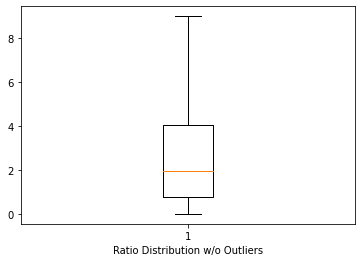

In [330]:
fiq, ax = plt.subplots()

ax.boxplot(tn_unflated_db['ratio'], showfliers = False)
ax.set_xlabel('Ratio Distribution w/o Outliers')

plt.show()

In [331]:
imdb_movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [332]:
tn_unflated_db.rename({'movie' : 'primary_title'}, inplace = True)

In [333]:
ratio_genre_df = tn_unflated_db.join(imdb_movie_basics_df)

In [334]:
ratio_genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5234 entries, 0 to 5781
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5234 non-null   int64  
 1   release_date       5234 non-null   object 
 2   movie              5234 non-null   object 
 3   production_budget  5234 non-null   int64  
 4   domestic_gross     5234 non-null   float64
 5   worldwide_gross    5234 non-null   float64
 6   worldwide_profits  5234 non-null   int64  
 7   ratio              5234 non-null   float64
 8   movie_id           5234 non-null   object 
 9   primary_title      5234 non-null   object 
 10  original_title     5234 non-null   object 
 11  start_year         5234 non-null   int64  
 12  runtime_minutes    2756 non-null   float64
 13  genres             4774 non-null   object 
dtypes: float64(4), int64(4), object(6)
memory usage: 773.4+ KB


In [335]:
ratio_genre_df.dropna(subset=['genres'],inplace=True)
unique_genres = []
for genres in list(ratio_genre_df['genres']):
    for genre in genres.split(','):
        unique_genres.append(genre)
unique_genres = set(unique_genres)

In [336]:
unique_genres

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

In [338]:
for genre in unique_genres:
    ratio_genre_df[genre] = ratio_genre_df['genres'].map(lambda x: genre in x)

In [350]:
ratio_genre_df.loc[:,'Horror': 'Drama'].sum()

Horror          382
Reality-TV        3
Adult            20
Talk-Show         3
Animation       133
Biography       176
Family          153
Thriller        421
Western          17
Mystery         125
History          94
Comedy          773
News              3
Documentary    1426
Adventure       226
Crime           219
Fantasy         146
Romance         273
Sci-Fi          123
Action          427
War              31
Music           132
Musical          40
Sport            57
Drama          1493
dtype: int64